In [33]:
import paramiko
import time
import pandas as pd
from collections import defaultdict
import psycopg2
import config
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt



def get_connection():
    connection = psycopg2.connect(user="rtu170",
                                  password="deac2022",
                                  host="192.168.99.165",
                                  port="5432",
                                  database="ExDatiDB")
    return connection


# Aizver savienojumu ar datu bāzi
def close_connection(connection):
    if connection:
        connection.close()

def read_database():
    laiks=[]
    dati=[]
    sensorid=[]
    datums = "30-01-2023 10:00:00"
    datums1= datetime.strptime(datums, '%d-%m-%Y %H:%M:%S')
    try:
        connection = get_connection()
        cursor = connection.cursor()
        postgreSQL_select_Query = "select * from zabbixdati"
        cursor.execute(postgreSQL_select_Query)
        exdatidb = cursor.fetchall()

        for row in exdatidb:
            #print(datums1)
            #print(row[1])
            laik3=str(row[1])[:16]
            laiks4=datetime.strptime(laik3, '%Y-%m-%d %H:%M')
            if datums1 <= laiks4:
                laiks.append(row[4])
                dati.append(row[2])
                sensorid.append(row[5])
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Error while getting data", error)
    return laiks,dati,sensorid

laiks,dati,sensorid=read_database()
kkas={}
idx=0
for sensoraid in sensorid:
    if sensoraid in kkas.keys():
        kkas[sensoraid].append((dati[idx],laiks[idx]))
    else:
        kkas[sensoraid]=[]
        kkas[sensoraid].append((dati[idx],laiks[idx]))
    idx+=1

for key in kkas.keys():
    
    valuex=[]
    laiksx=[]
    #mainigaisvalue=''
    #mainigaislaiks=''
    for tupl in kkas['{}'.format(key)]:
        if '"' not in tupl[0]:
            valuex.append(tupl[0])
            laiksx.append(tupl[1])

    #print(valuex)


In [34]:
#print(kkas.keys())
valuex1=[]
laiksx1=[]
for tupl in kkas['926333']:
    valuex1.append(float(tupl[0]))
    laiksx1.append(tupl[1])
#valuex1.pop(-1)
#valuex1.append(float('212.000'))
print(valuex1)
#print(len(valuex1),len(laiksx1))
#print(laiksx1)

[208.0, 205.8, 204.2, 204.0, 205.3, 205.2, 205.3, 205.0, 202.4, 205.1, 204.0, 207.8, 206.3, 204.6, 203.3, 205.2, 204.9, 207.6, 204.9, 206.2, 204.8, 207.0, 209.6]


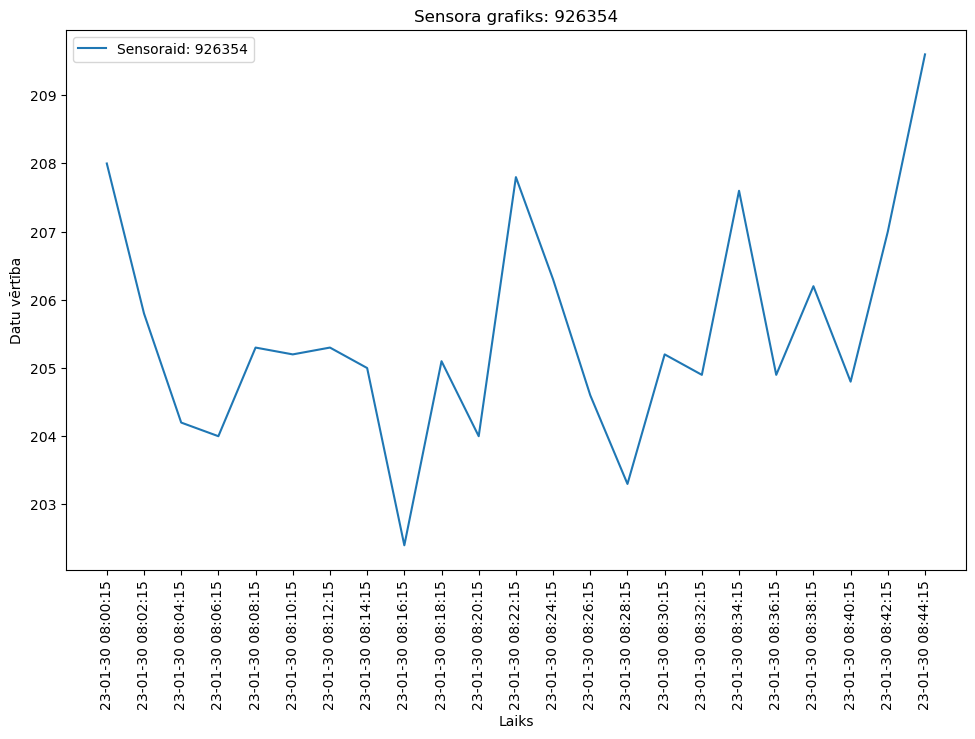

In [35]:
fig_1=plt.figure(figsize=(10,6),dpi=100)
axes_1 = fig_1.add_axes([0.05,0.05,0.9,0.9])
axes_1.set_xlabel('Laiks')
axes_1.set_ylabel('Datu vērtība')
axes_1.set_title('Sensora grafiks: {}'.format(key))
plt.xticks(rotation=90)#, ha='right')
axes_1.plot(laiksx1,valuex1,label='Sensoraid: {}'.format(key))
#axes_1.plot(x_1,y_2,label='2. serveru skapis')
axes_1.legend(loc=0)
plt.show()

[208.0, 205.8, 204.2, 204.0, 205.3, 205.2, 205.3, 205.0, 202.4, 205.1, 204.0, 207.8, 206.3, 204.6, 203.3, 205.2, 204.9, 207.6, 204.9, 206.2, 204.8, 207.0, 209.6]


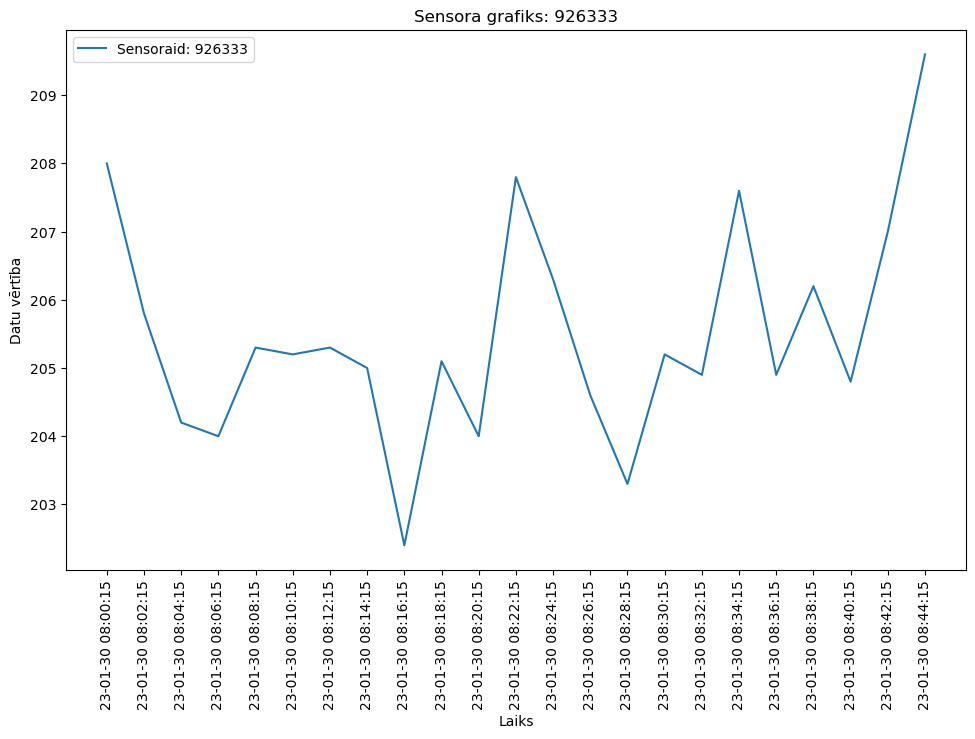

[188.8, 186.6, 188.2, 186.6, 188.3, 185.8, 187.3, 187.2, 188.0, 183.6, 189.6, 187.2, 188.4, 186.1, 183.1, 188.9, 185.4, 185.7, 189.6, 187.7, 185.2, 187.4, 188.9]


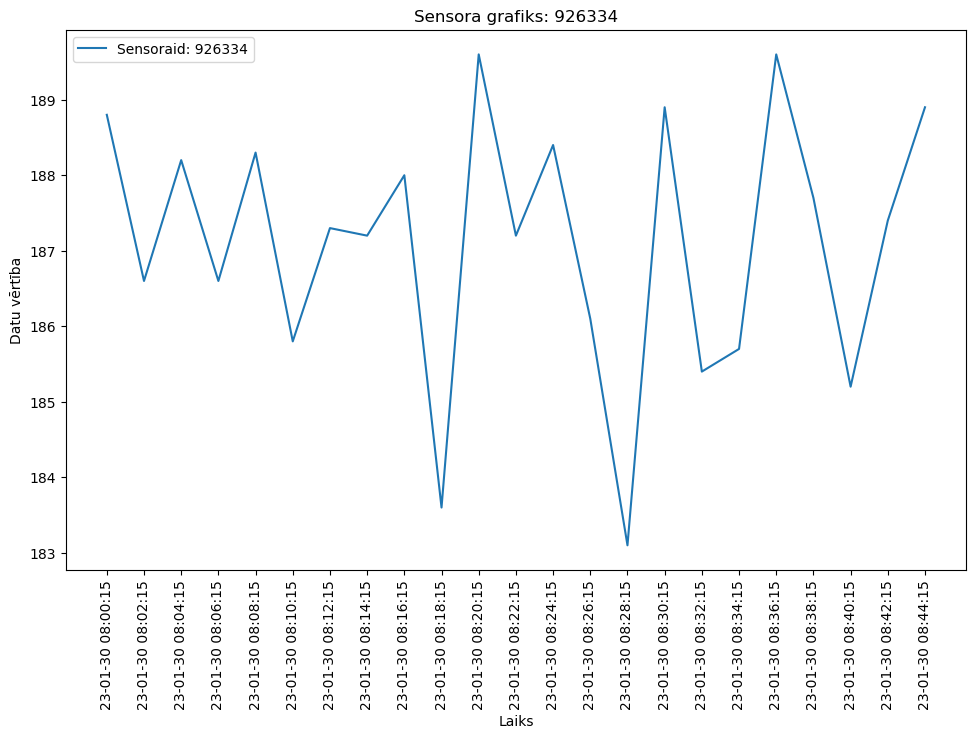

[174.0, 176.0, 176.1, 175.6, 171.4, 175.2, 174.2, 169.8, 173.1, 174.2, 174.7, 171.1, 172.9, 172.0, 174.1, 177.2, 173.2, 175.2, 176.0, 173.7, 174.9, 176.0, 173.7]


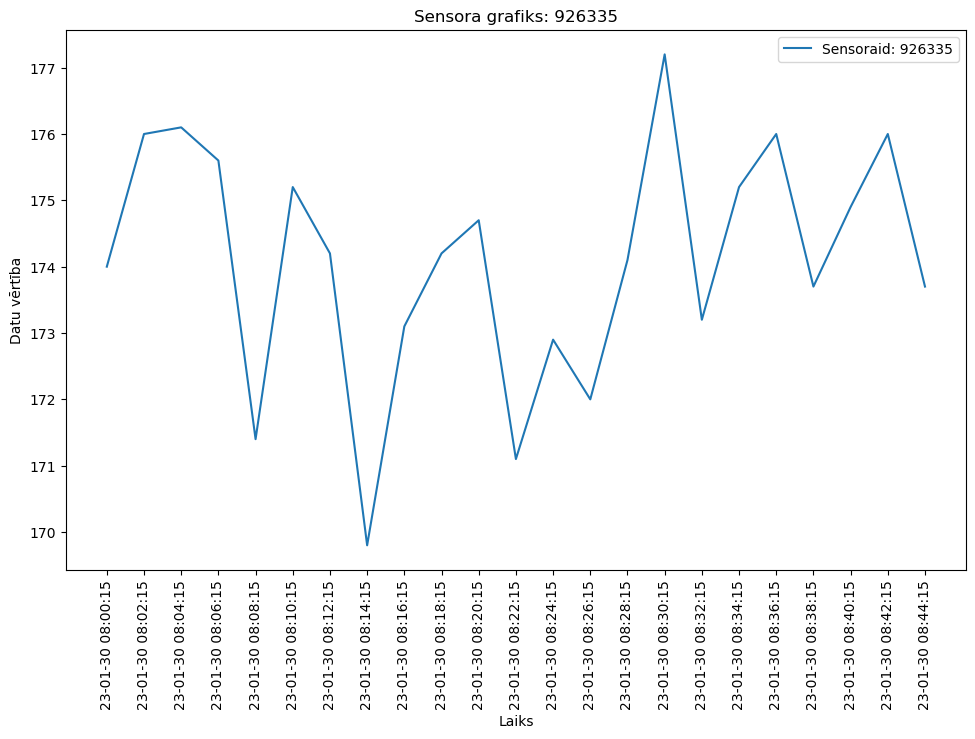

[48.12, 47.62, 47.25, 47.12, 47.5, 47.37, 47.5, 47.37, 46.87, 47.5, 47.12, 48.0, 47.75, 47.37, 47.12, 47.5, 47.5, 48.0, 47.37, 47.75, 47.37, 47.87, 48.5]


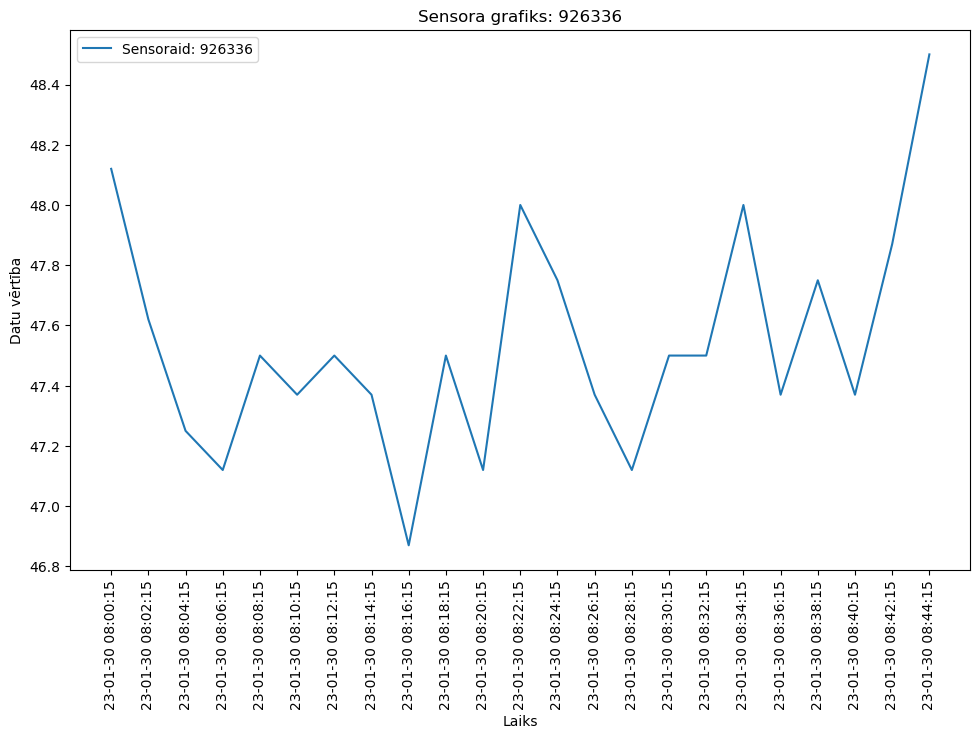

[43.75, 43.25, 43.5, 43.25, 43.5, 43.0, 43.37, 43.37, 43.5, 42.5, 43.87, 43.37, 43.62, 43.12, 42.37, 43.75, 42.87, 43.0, 43.87, 43.5, 42.87, 43.37, 43.75]


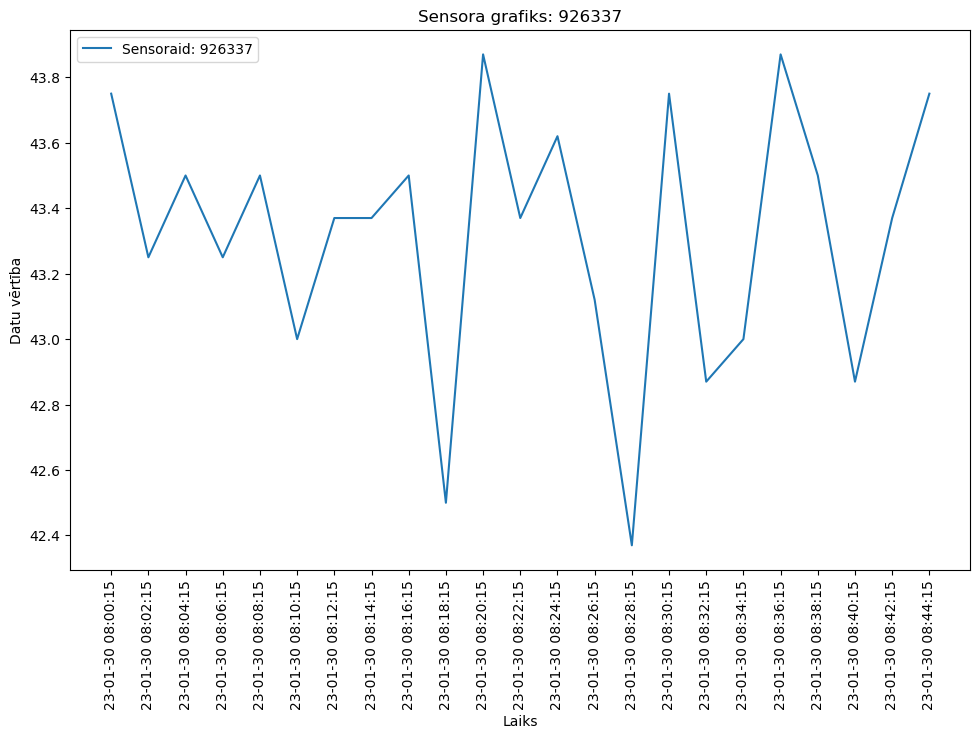

[40.25, 40.75, 40.75, 40.62, 39.75, 40.62, 40.25, 39.37, 40.12, 40.37, 40.37, 39.62, 40.0, 39.75, 40.25, 41.0, 40.12, 40.5, 40.75, 40.12, 40.37, 40.62, 40.25]


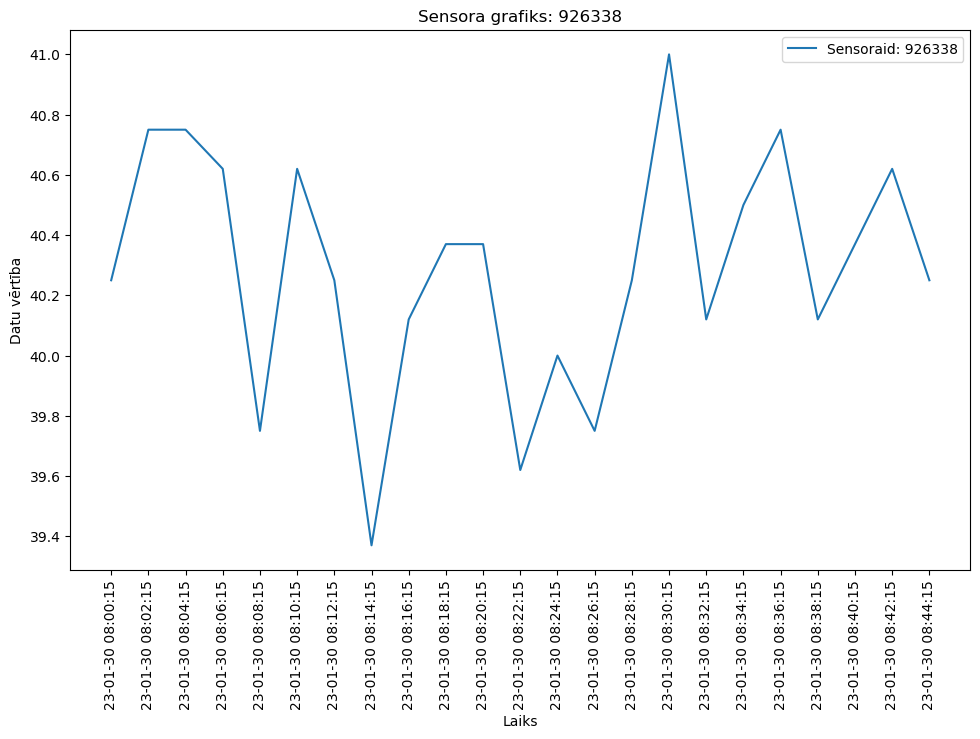

[400.0, 401.0, 401.0, 401.0, 401.0, 401.0, 401.0, 401.0, 401.0, 401.0, 401.0, 400.0, 401.0, 401.0, 401.0, 400.0, 401.0, 401.0, 400.0, 401.0, 401.0, 401.0, 400.0]


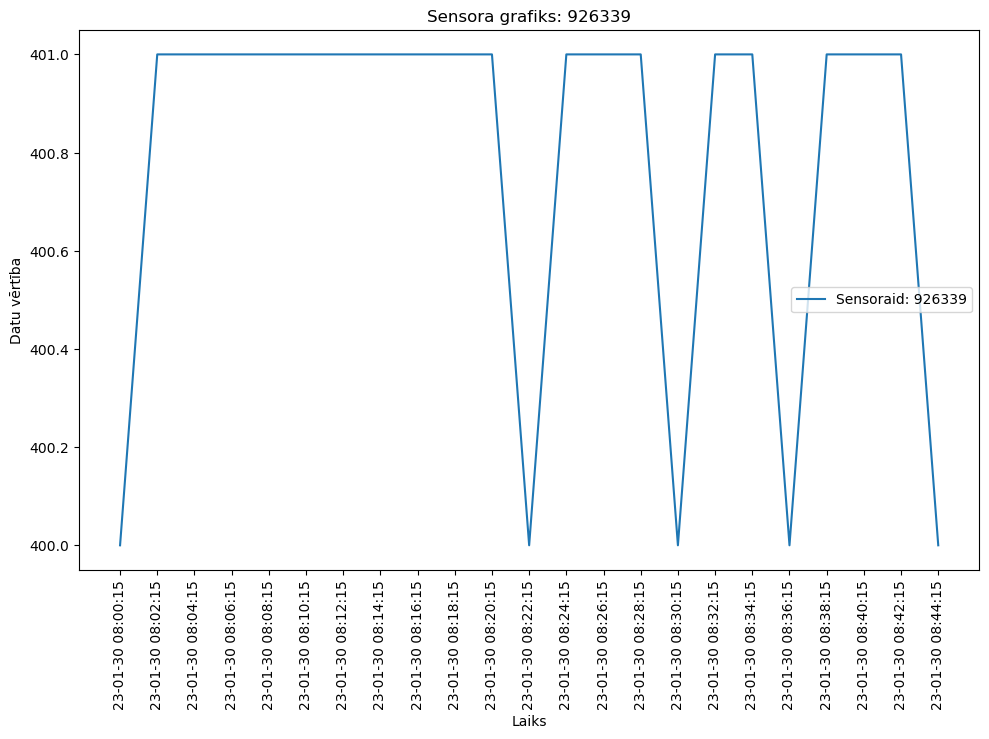

[401.0, 401.0, 401.0, 401.0, 401.0, 401.0, 401.0, 401.0, 400.0, 401.0, 401.0, 401.0, 400.0, 401.0, 400.0, 401.0, 400.0, 401.0, 401.0, 401.0, 401.0, 401.0, 401.0]


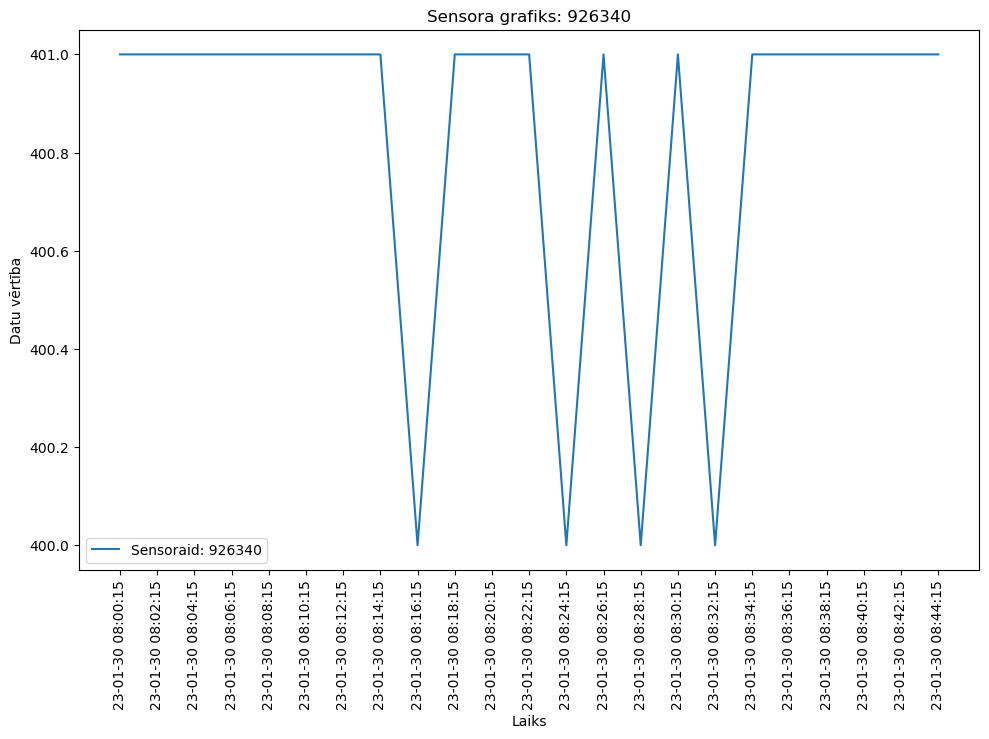

[401.0, 400.0, 401.0, 401.0, 401.0, 400.0, 400.0, 400.0, 401.0, 400.0, 401.0, 401.0, 401.0, 400.0, 401.0, 401.0, 401.0, 400.0, 401.0, 400.0, 400.0, 401.0, 401.0]


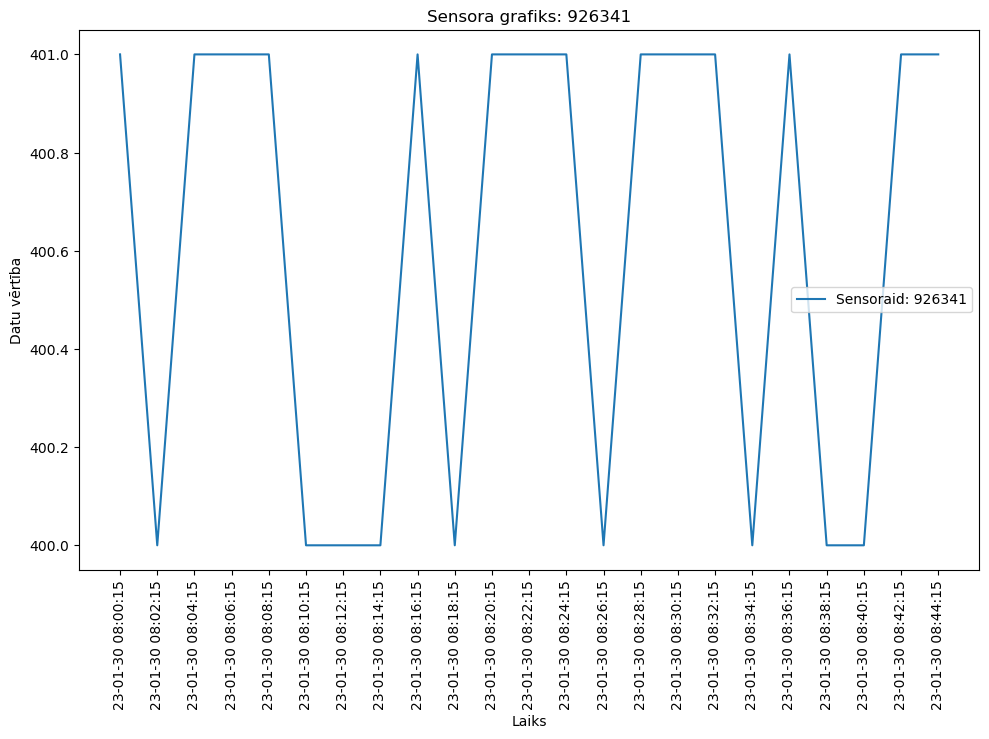

[31.4, 31.0, 31.0, 30.9, 30.6, 30.4, 30.7, 30.6, 30.6, 31.1, 30.7, 31.0, 31.0, 30.6, 30.9, 31.1, 29.9, 30.9, 30.6, 30.0, 30.6, 30.6, 30.6, 30.7, 31.0, 31.0, 30.6, 30.0, 30.0, 30.1, 30.9, 31.3, 31.0, 31.1, 30.0, 31.0, 30.1, 30.6, 31.0, 30.1, 30.6, 30.4, 30.1, 31.0, 31.0]


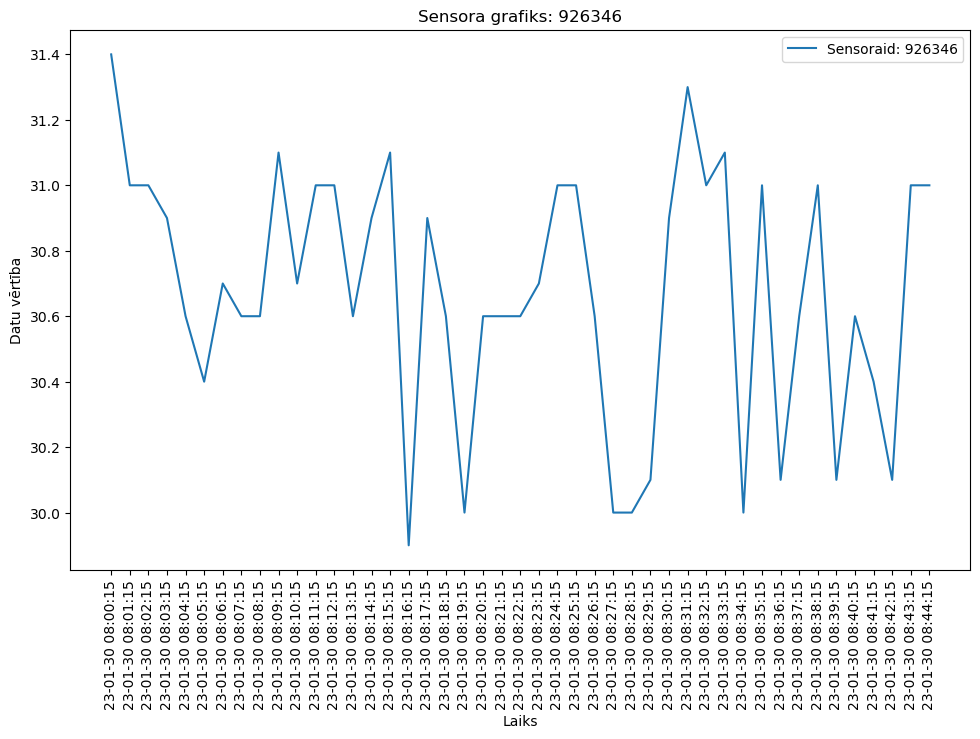

[76.0, 76.6, 76.9, 76.9, 76.6, 77.6, 76.0, 76.0, 74.6, 75.7, 74.9, 75.0, 77.6, 76.6, 75.6, 76.6, 76.6, 75.0, 76.6, 77.1, 76.3, 76.9, 76.0, 78.1, 76.6, 76.4, 74.0, 76.7, 76.0, 75.0, 74.9, 77.0, 76.7, 75.6, 76.6, 76.0, 76.6, 75.6, 76.4, 75.7, 74.9, 77.1, 75.7, 74.6, 75.0]


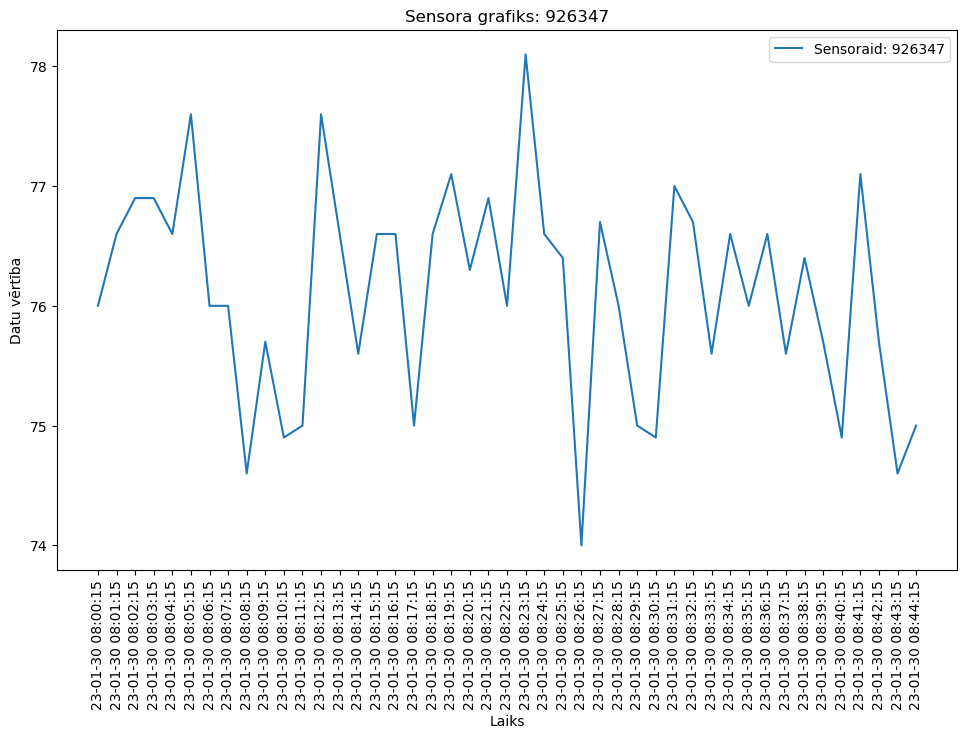

[101.0, 99.6, 99.9, 100.4, 100.0, 97.6, 100.0, 99.3, 99.9, 99.4, 99.1, 99.3, 100.7, 99.3, 98.1, 99.7, 99.6, 100.6, 97.9, 99.0, 100.0, 99.6, 99.1, 101.1, 100.1, 99.7, 100.6, 100.0, 100.7, 100.9, 100.0, 100.7, 99.3, 98.0, 98.1, 99.4, 99.0, 99.3, 99.6, 98.0, 98.6, 98.9, 100.0, 99.1, 101.0]


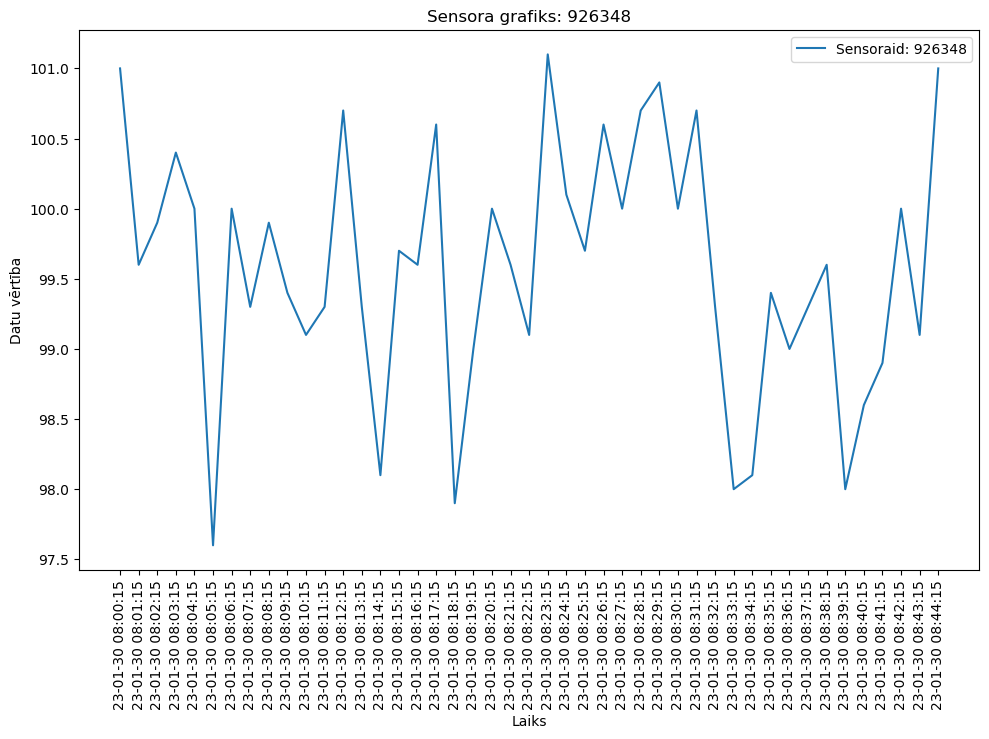

[53.9, 53.7, 53.0, 52.3, 52.7, 51.4, 51.1, 52.0, 51.3, 51.7, 52.1, 51.3, 53.1, 53.1, 52.0, 51.6, 52.9, 52.3, 52.1, 51.4, 51.7, 53.0, 53.0, 51.3, 50.7, 53.0, 52.0, 53.4, 51.6, 51.1, 53.6, 52.0, 52.9, 51.6, 53.0, 53.0, 53.1, 51.6, 52.7, 51.9, 51.4, 52.0, 52.4, 52.3, 52.6]


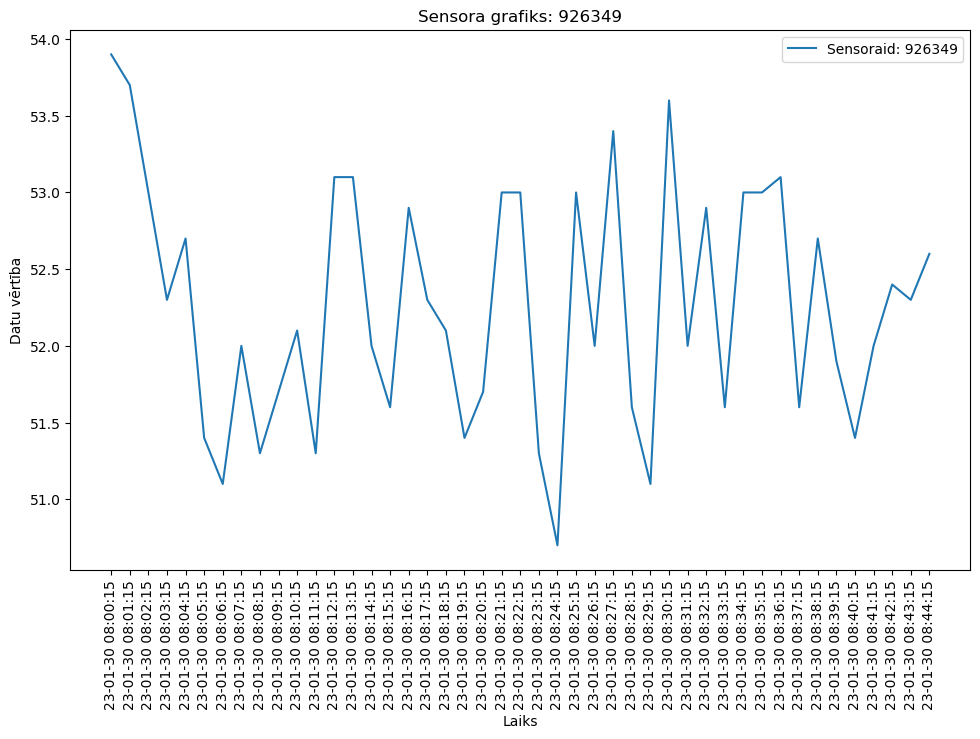

[69.0, 67.6, 68.0, 67.4, 68.0, 67.0, 68.0, 68.9, 68.0, 68.7, 69.6, 67.7, 68.9, 67.0, 69.0, 67.9, 68.0, 69.6, 66.6, 68.3, 67.7, 68.0, 67.6, 67.9, 68.7, 66.9, 68.4, 66.9, 67.7, 68.6, 69.0, 66.6, 68.7, 67.9, 67.9, 69.0, 69.6, 68.0, 68.9, 68.3, 68.4, 67.3, 69.0, 68.1, 70.0]


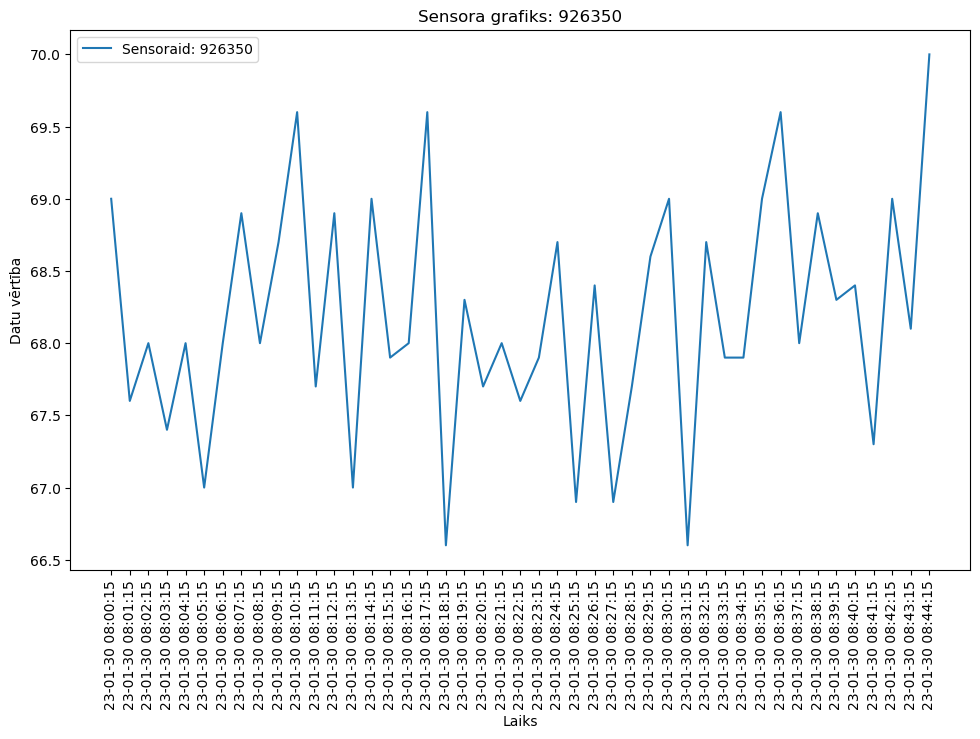

[65.6, 66.9, 64.9, 64.4, 65.6, 66.4, 65.6, 65.4, 65.0, 65.9, 66.1, 64.9, 65.3, 65.9, 65.1, 65.9, 66.0, 66.9, 64.9, 67.0, 65.3, 65.4, 66.9, 65.4, 66.6, 65.7, 65.3, 64.4, 64.4, 65.3, 65.6, 67.3, 67.9, 65.6, 67.1, 66.9, 66.9, 66.9, 66.0, 66.0, 66.7, 65.1, 65.3, 67.0, 65.9]


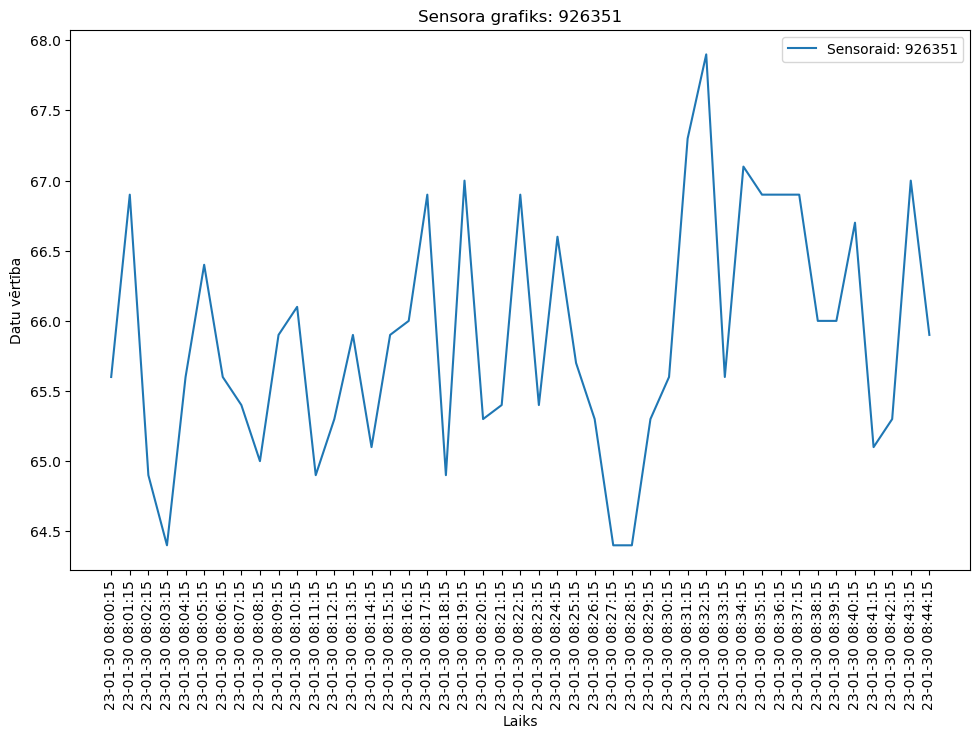

[42.3, 42.0, 42.3, 42.0, 41.9, 42.0, 42.0, 42.0, 42.0, 42.6, 42.6, 42.7, 41.6, 41.4, 42.6, 42.1, 41.0, 41.6, 42.0, 42.1, 42.6, 42.0, 41.7, 42.3, 42.6, 42.0, 42.4, 42.4, 43.0, 43.0, 42.3, 42.1, 41.6, 41.6, 42.0, 41.3, 41.9, 41.6, 41.9, 42.0, 41.6, 42.0, 42.3, 41.7, 41.9]


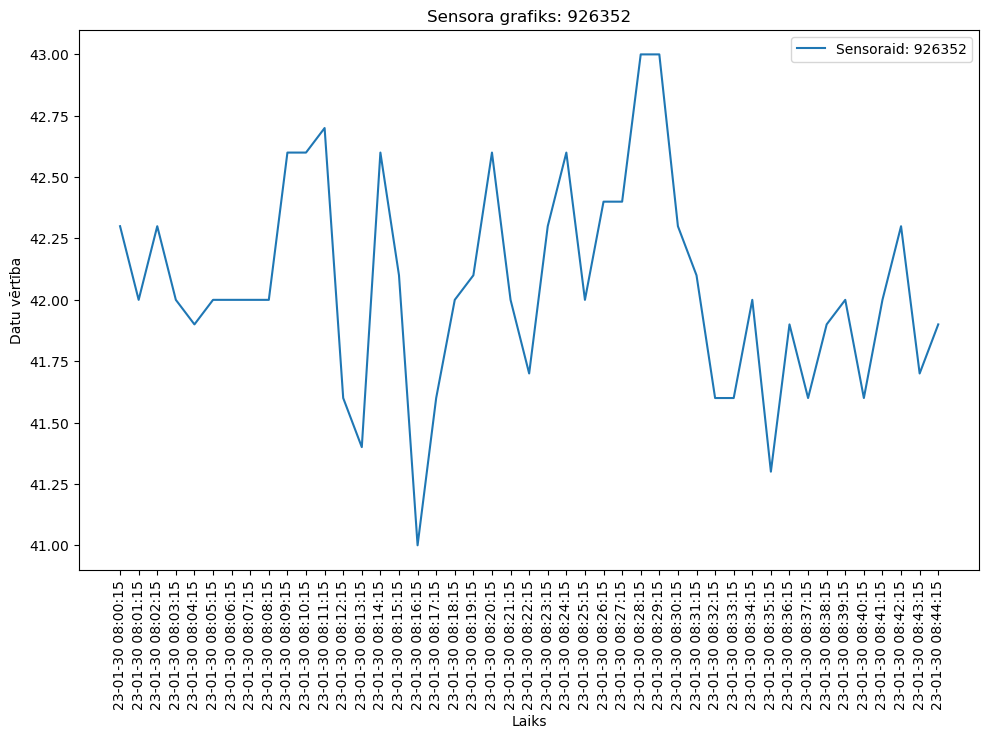

[68.6, 68.0, 69.0, 67.9, 68.3, 68.0, 67.4, 69.0, 67.0, 67.0, 67.0, 68.1, 68.9, 68.1, 66.3, 68.0, 68.1, 66.3, 68.0, 66.3, 67.1, 69.1, 66.9, 68.0, 68.0, 69.1, 67.1, 68.0, 68.3, 66.0, 68.0, 68.0, 67.0, 68.0, 67.1, 67.4, 68.0, 68.6, 67.0, 67.0, 66.9, 68.1, 66.3, 68.0, 68.6]


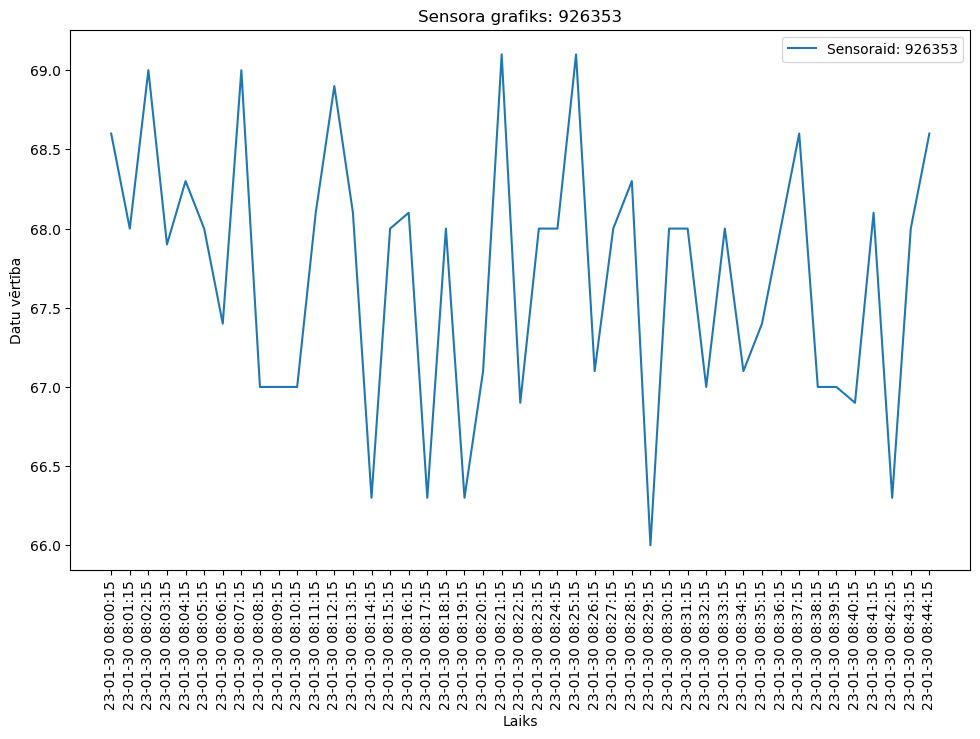

[66.0, 65.6, 66.7, 66.4, 65.1, 67.3, 66.4, 64.9, 65.7, 64.9, 65.6, 65.0, 65.0, 64.3, 65.0, 64.7, 65.0, 64.6, 65.0, 64.0, 65.7, 65.7, 64.6, 65.0, 64.3, 64.4, 66.6, 64.7, 64.7, 65.6, 66.0, 64.0, 65.0, 64.6, 64.7, 65.6, 65.4, 65.0, 64.1, 64.6, 65.4, 64.3, 66.4, 64.4, 65.7]


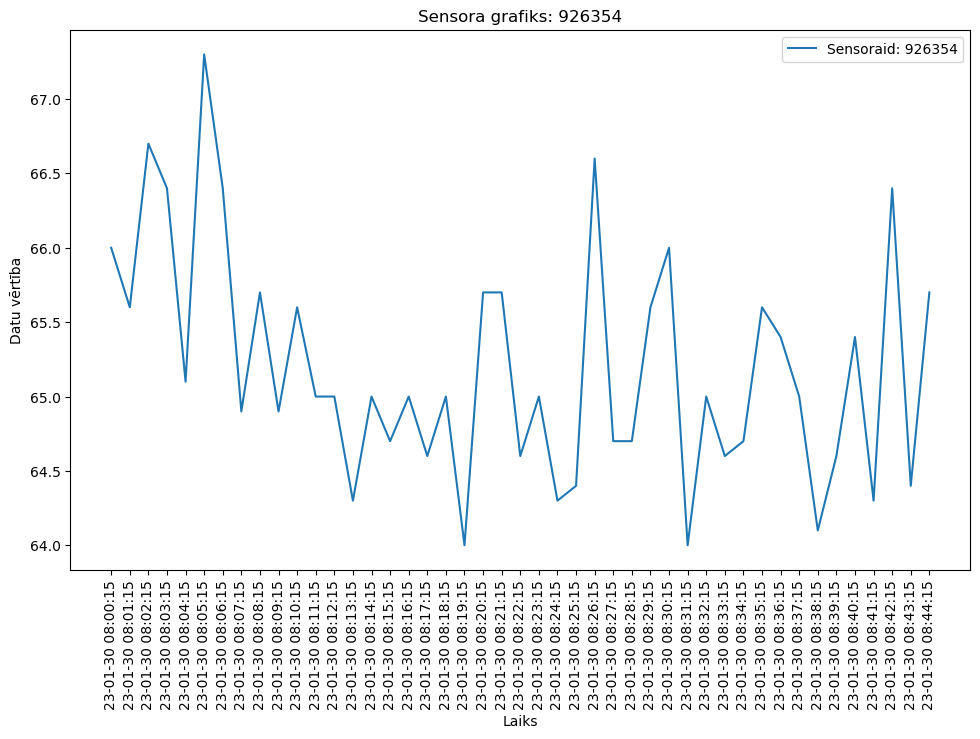

In [36]:
for key in kkas.keys():
    
    valuex=[]
    laiksx=[]
    #mainigaisvalue=''
    #mainigaislaiks=''
    for tupl in kkas['{}'.format(key)]:
        if '"' not in tupl[0]:
            valuex.append(float(tupl[0]))
            laiksx.append(tupl[1])
    print(valuex)
    fig_1=plt.figure(figsize=(10,6),dpi=100)
    axes_1 = fig_1.add_axes([0.05,0.05,0.9,0.9])
    axes_1.set_xlabel('Laiks')
    axes_1.set_ylabel('Datu vērtība')
    axes_1.set_title('Sensora grafiks: {}'.format(key))
    plt.xticks(rotation=90)#, ha='right')
    axes_1.plot(laiksx,valuex,label='Sensoraid: {}'.format(key))
    #axes_1.plot(x_1,y_2,label='2. serveru skapis')
    axes_1.legend(loc=0)
    plt.show()